In [116]:
#importing libraries
import pandas as pd
import numpy as np
import scipy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [118]:
df_math = pd.read_clipboard()

In [119]:
df_math.head(3)

,1,"China Shanghai, China",613
0,2,Singapore,573
1,3,"Hong Kong, China",561
2,4,Taiwan,560


In [120]:
df_science = pd.read_clipboard()

In [121]:
df_science.head(5)

,1,"China Shanghai, China",580
0,2,"Hong Kong, China",555
1,3,Singapore,551
2,4,Japan,547
3,5,Finland,545
4,6,Estonia,541


In [122]:
df_reading= pd.read_clipboard()

In [123]:
df_reading.head(10)

,1,"China Shanghai, China",570
0,2,"Hong Kong, China",545
1,3,Singapore,542
2,4,Japan,538
3,5,South Korea,536
4,6,Finland,524
5,7=,Taiwan,523
6,7=,Canada,523
7,7=,Ireland,523
8,10,Poland,518
9,11=,Liechtenstein,516


In [124]:
df_math.loc[64]=np.array([66,"China Shanghai, China",613])

<ipython-input-124-33bda58e39e9>:1: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  df_math.loc[64]=np.array([66,"China Shanghai, China",613])


In [125]:
df_reading.loc[64]=np.array([66,"China Shanghai, China",570])

<ipython-input-125-417a4d474670>:1: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  df_reading.loc[64]=np.array([66,"China Shanghai, China",570])


In [126]:
df_science.loc[64]=np.array([66,"China Shanghai, China",580])

<ipython-input-126-e30170f2d73c>:1: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  df_science.loc[64]=np.array([66,"China Shanghai, China",580])


In [127]:
df_science.columns

Index(['1', 'China Shanghai, China', '580'], dtype='object')

In [128]:
df_reading = df_reading.rename(index=str, columns={"1": "Rank", "China Shanghai, China": "Country","570":"Score"})

In [129]:
df_reading.head(2)

,Rank,Country,Score
0,2,"Hong Kong, China",545
1,3,Singapore,542


In [130]:
df_science =df_science.rename(index=str, columns={"1": "Rank", "China Shanghai, China": "Country","580":"Score"})

In [131]:
df_science.head(2)

,Rank,Country,Score
0,2,"Hong Kong, China",555
1,3,Singapore,551


In [132]:
df_math = df_math.rename(index=str, columns={"1": "Rank", "China Shanghai, China": "Country","613":"Score"})

In [133]:
df_math.head(2)

,Rank,Country,Score
0,2,Singapore,573
1,3,"Hong Kong, China",561


In [134]:
temp = pd.merge(df_math, df_science, on='Country', how ='outer')

In [135]:
temp.head(5)

,Rank_x,Country,Score_x,Rank_y,Score_y
0,2,Singapore,573,3,551
1,3,"Hong Kong, China",561,2,555
2,4,Taiwan,560,13,523
3,5,South Korea,554,7,538
4,6,"Macau, China",538,16=,521


In [136]:
temp = pd.merge(temp, df_reading, on= 'Country', how='outer')

In [137]:
temp.head(5)

,Rank_x,Country,Score_x,Rank_y,Score_y,Rank,Score
0,2,Singapore,573,3,551,3,542
1,3,"Hong Kong, China",561,2,555,2,545
2,4,Taiwan,560,13,523,7=,523
3,5,South Korea,554,7,538,5,536
4,6,"Macau, China",538,16=,521,16=,509


In [159]:
del temp['Rank_x']

In [160]:
temp.head(5)

,Country,Score_x,Rank_y,Score_y,Rank,Score
0,Singapore,573,3,551,3,542
1,"Hong Kong, China",561,2,555,2,545
2,Taiwan,560,13,523,7=,523
3,South Korea,554,7,538,5,536
4,"Macau, China",538,16=,521,16=,509


In [161]:
df= temp.rename(index=str, columns={"Country":"Country", "Score_x":"Math", "Score_y":"Science","Score":"Reading"})

In [162]:
df.head(1)

,Country,Math,Rank_y,Science,Rank,Reading
0,Singapore,573,3,551,3,542


In [163]:
df['Math'] = pd.to_numeric(df['Math'])

In [164]:
df['Science'] = pd.to_numeric(df['Science'])

In [165]:
df['Reading'] = pd.to_numeric(df['Reading'])

In [166]:
df['Average']=(df['Math']+df['Science']+df['Reading'])/3

In [167]:
df.head(5)

,Country,Math,Rank_y,Science,Rank,Reading,Average
0,Singapore,573,3,551,3,542,555.333333
1,"Hong Kong, China",561,2,555,2,545,553.666667
2,Taiwan,560,13,523,7=,523,535.333333
3,South Korea,554,7,538,5,536,542.666667
4,"Macau, China",538,16=,521,16=,509,522.666667


In [168]:
df['Rank'] = df['Average'].rank(ascending=False)

In [169]:
df.head(10)

,Country,Math,Rank_y,Science,Rank,Reading,Average
0,Singapore,573,3,551,2.0,542,555.333333
1,"Hong Kong, China",561,2,555,3.0,545,553.666667
2,Taiwan,560,13,523,6.0,523,535.333333
3,South Korea,554,7,538,4.0,536,542.666667
4,"Macau, China",538,16=,521,10.0,509,522.666667
5,Japan,536,4,547,5.0,538,540.333333
6,Liechtenstein,535,10=,525,9.0,516,525.333333
7,Switzerland,531,19,515,14.0,509,518.333333
8,Netherlands,523,14=,522,13.0,511,518.666667
9,Estonia,521,6,541,8.0,516,526.000000


In [170]:
df.sort_values('Rank')

,Country,Math,Rank_y,Science,Rank,Reading,Average
64,"China Shanghai, China",613,66,580,1.0,570,587.666667
0,Singapore,573,3,551,2.0,542,555.333333
1,"Hong Kong, China",561,2,555,3.0,545,553.666667
3,South Korea,554,7,538,4.0,536,542.666667
5,Japan,536,4,547,5.0,538,540.333333
...,...,...,...,...,...,...,...
55,Albania,394,62,397,61.0,394,395.000000
60,Colombia,376,60,399,62.0,403,392.666667
62,Indonesia,375,64,382,63.0,396,384.333333
61,Qatar,376,63,384,64.0,388,382.666667


In [171]:
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

In [172]:
import random
random.seed(0)
a = df['Average']
b = df['Math']

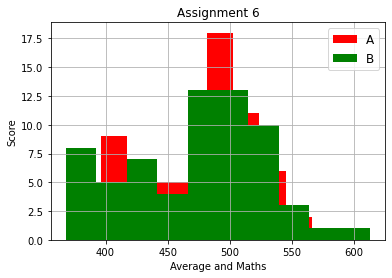

In [173]:
plt.title("Assignment 6")
plt.xlabel('Average and Maths')
plt.ylabel('Score')
plt.hist(a, label ='A', color='r')
plt.hist(b, label='B' , color='g')
plt.legend(prop={'size':12})
plt.grid()
plt.show()

In [177]:
def find_anomaly(data):
    anomaly_list = list()
    for index, val in enumerate(data):
        data_mean = np.mean(data)
        data_std = np.std(data)
        
        if abs(val - data_mean) > data_std * 1.8:
            anomaly_list.append(index)
            
    return anomaly_list

In [178]:
def find_Outlier(Column):
    Values = list(df[Column])
    countries = list(df['Country'])
    data = np.array(Values)
    indicies = find_anomaly(data)
    anomaly_Countries = list()
    for index in indicies:
        anomaly_Countries.append(countries[index])
    print("The outliers in {0} are {1}".format(Column, anomaly_Countries))

In [179]:
find_Outlier('Math')

The outliers in Math are [' Singapore', ' Peru', 'China Shanghai, China']


In [180]:
find_Outlier('Science')

The outliers in Science are [' Qatar', ' Indonesia', ' Peru', 'China Shanghai, China']


In [181]:
find_Outlier ("Reading")

The outliers in Reading are [' Qatar', ' Peru', 'China Shanghai, China']


In [182]:
find_Outlier('Average')

The outliers in Average are [' Qatar', ' Indonesia', ' Peru', 'China Shanghai, China']
